In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [34]:
training_set = pd.read_csv("UNSW_NB15_training-set.csv")
testing_set = pd.read_csv("UNSW_NB15_testing-set.csv")

In [35]:
missing_values_training = training_set.isnull().sum()
missing_values_testing = testing_set.isnull().sum()

In [36]:
print("Missing Values in Training Set:")
print(missing_values_training)

print("\nMissing Values in Testing Set:")
print(missing_values_testing)

Missing Values in Training Set:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is

In [49]:
training_set.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [50]:
testing_set.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [37]:
training_counts = training_set['label'].value_counts(normalize=True) * 100
testing_counts = testing_set['label'].value_counts(normalize=True) * 100

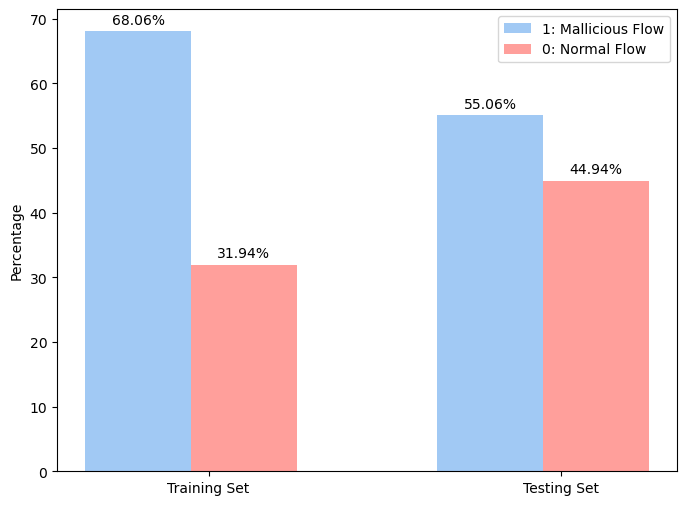

In [38]:
colors = sns.color_palette("pastel")
fig, ax = plt.subplots(figsize=(8, 6))

x_positions = [0, 1]
bar1 = ax.bar(x_positions, [training_counts[1], testing_counts[1]], width=0.3, label='1', color=colors[0])
bar2 = ax.bar([x + 0.3 for x in x_positions], [training_counts[0], testing_counts[0]], width=0.3, label='0', color=colors[3])

ax.set_xticks([x + 0.2 for x in x_positions])
ax.set_xticklabels(['Training Set', 'Testing Set'])
ax.set_ylabel('Percentage')
ax.legend(handles=[bar1, bar2], labels=['1: Mallicious Flow', '0: Normal Flow'], loc='upper right')

def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom')

add_percentage_labels(bar1)
add_percentage_labels(bar2)

plt.show()


In [43]:
total_data_count_training = training_set['label'].replace({0: 'Normal', 1: 'Attack'}).value_counts(sort=True)
total_data_percentage_training = training_set["label"].replace({0: 'Normal', 1: 'Attack'}).value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

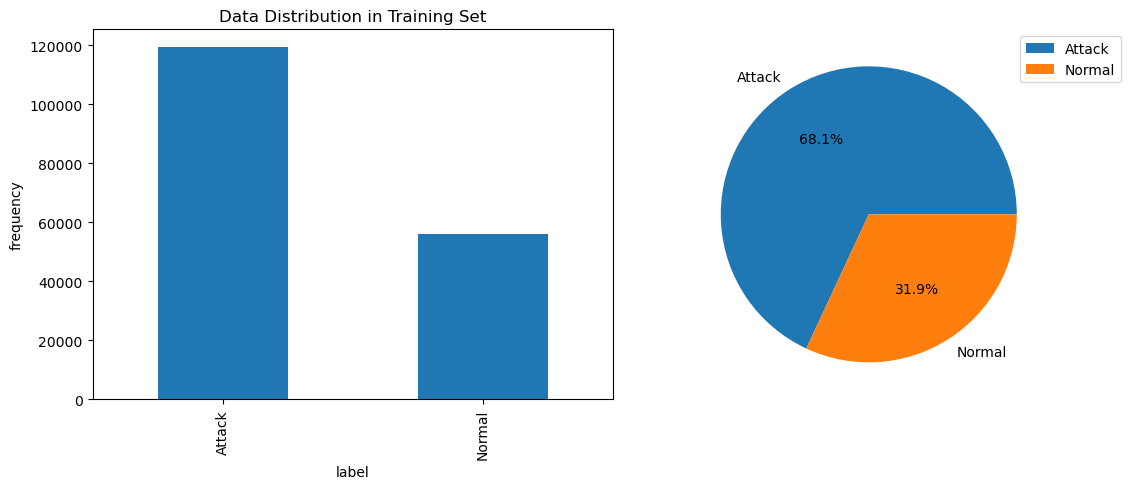

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart
total_data_count_training.plot(kind='bar', ax=ax1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title("Data Distribution in Training Set")
ax1.set_xlabel('label')
ax1.set_ylabel('frequency')

# Pie Chart
sizes = training_set['label'].value_counts()
pie_df = pd.DataFrame({'label': sizes.index.map({0: 'Normal', 1: 'Attack'}), 'count': sizes.values})
pie_ax = pie_df.groupby('label').sum().plot(kind='pie', y='count', label='Data Class', autopct='%1.1f%%', ax=ax2)
pie_ax.set_ylabel('')
pie_ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Display both plots
plt.tight_layout()
plt.show()


In [47]:
total_data_count_testing = testing_set['label'].replace({0: 'Normal', 1: 'Attack'}).value_counts(sort=True)
total_data_percentage_testing = testing_set["label"].replace({0: 'Normal', 1: 'Attack'}).value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

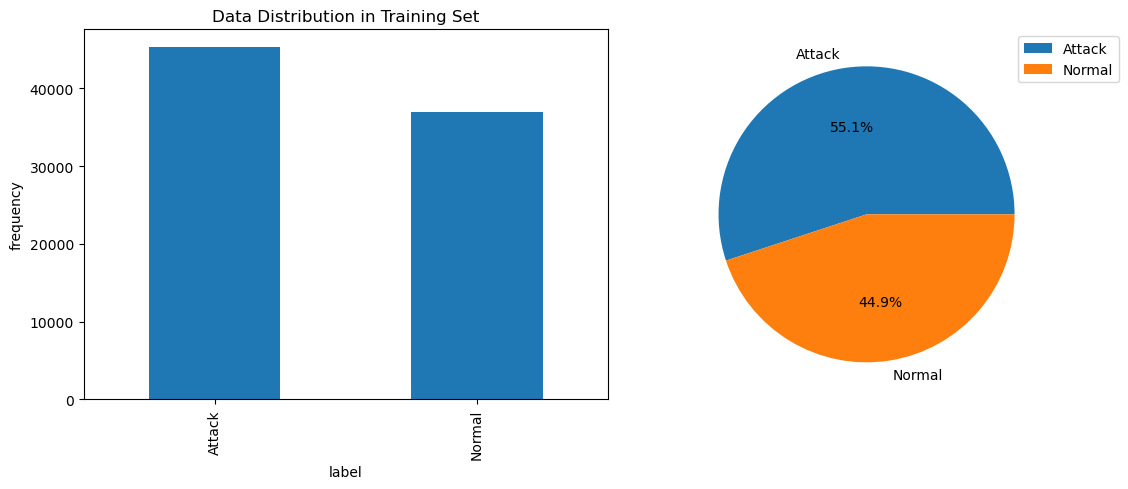

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart
total_data_count_testing.plot(kind='bar', ax=ax1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title("Data Distribution in Training Set")
ax1.set_xlabel('label')
ax1.set_ylabel('frequency')

# Pie Chart
sizes = testing_set['label'].value_counts()
pie_df = pd.DataFrame({'label': sizes.index.map({0: 'Normal', 1: 'Attack'}), 'count': sizes.values})
pie_ax = pie_df.groupby('label').sum().plot(kind='pie', y='count', label='Data Class', autopct='%1.1f%%', ax=ax2)
pie_ax.set_ylabel('')
pie_ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Display both plots
plt.tight_layout()
plt.show()

# Frequency Encoding to handle Categorical Features

In [3]:
merged_df = pd.concat([training_set, testing_set], ignore_index=True)

In [4]:
merged_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
257669,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
257671,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [7]:
merged_df = merged_df.drop(["id"], axis = 1)
merged_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [8]:
freq_proto = merged_df['proto'].value_counts()

In [9]:
freq_proto

tcp       123041
udp        92701
unas       15599
arp         3846
ospf        3271
           ...  
egp          131
netblt       131
igmp          48
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64

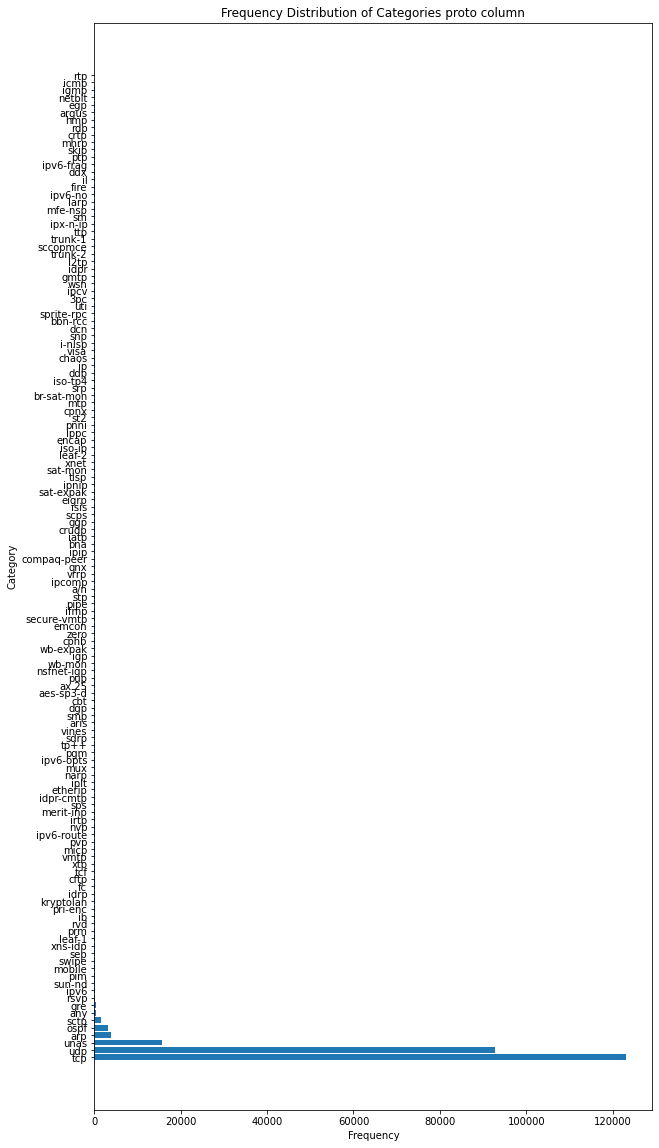

In [10]:
plt.figure(figsize = (10,20))
plt.barh(freq_proto.index, freq_proto.values)
plt.title('Frequency Distribution of Categories proto column')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

In [11]:
noise = np.random.normal(0, 0.01, len(freq_proto))
freq_proto += noise

In [12]:
freq_proto

tcp       123041.020944
udp        92700.995071
unas       15598.996191
arp         3846.000729
ospf        3270.997949
              ...      
egp          130.996919
netblt       131.007919
igmp          48.019782
icmp          14.989227
rtp            0.988244
Name: proto, Length: 133, dtype: float64

In [13]:
merged_df['proto'] = merged_df['proto'].map(freq_proto)

In [14]:
merged_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,92700.995071,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,123041.020944,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,92700.995071,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,92700.995071,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [15]:
freq_service = merged_df['service'].value_counts()

In [16]:
freq_service

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

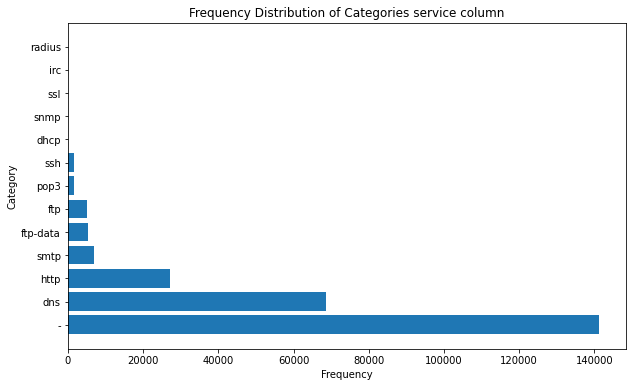

In [17]:
plt.figure(figsize = (10,6))
plt.barh(freq_service.index, freq_service.values)
plt.title('Frequency Distribution of Categories service column')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

In [18]:
noise = np.random.normal(0, 0.01, len(freq_service))
freq_service += noise

In [19]:
freq_service

-           141321.008087
dns          68661.005174
http         27011.009244
smtp          6909.030693
ftp-data      5390.993252
ftp           4979.997301
pop3          1527.998519
ssh           1506.005699
dhcp           119.990727
snmp           109.012157
ssl             85.996995
irc             29.989673
radius          20.988494
Name: service, dtype: float64

In [20]:
merged_df['service'] = merged_df['service'].map(freq_service)

In [21]:
merged_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,141321.008087,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,141321.008087,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,141321.008087,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,141321.008087,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,141321.008087,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,92700.995071,68661.005174,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,123041.020944,141321.008087,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,92700.995071,68661.005174,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,92700.995071,68661.005174,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [22]:
freq_state = merged_df['state'].value_counts()

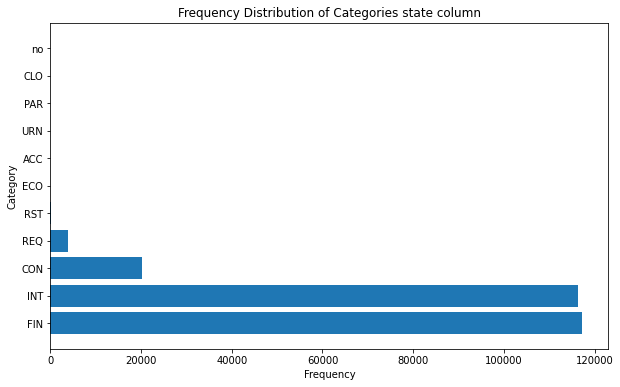

In [23]:
plt.figure(figsize = (10,6))
plt.barh(freq_state.index, freq_state.values)
plt.title('Frequency Distribution of Categories state column')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

In [24]:
noise = np.random.normal(0, 0.01, len(freq_state))
freq_state += noise

In [25]:
freq_state

FIN    117163.991557
INT    116438.010265
CON     20133.998535
REQ      3832.990556
RST        83.996764
ECO        11.986723
ACC         4.001851
URN         1.014774
PAR         1.006925
CLO         0.995366
no          0.990945
Name: state, dtype: float64

In [26]:
merged_df['state'] = merged_df['state'].map(freq_state)

In [27]:
merged_df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,141321.008087,116438.010265,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,141321.008087,116438.010265,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,141321.008087,116438.010265,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,141321.008087,116438.010265,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,141321.008087,116438.010265,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,123041.020944,141321.008087,117163.991557,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [30]:
merged_df_shuffled = merged_df.sample(frac=1).reset_index(drop=True)

In [31]:
merged_df_shuffled

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000002,92700.995071,68661.005174,116438.010265,2,0,114,0,500000.001300,254,...,14,24,0,0,0,14,24,0,Generic,1
1,0.000005,92700.995071,68661.005174,116438.010265,2,0,114,0,200000.005100,254,...,16,39,0,0,0,39,39,0,Generic,1
2,0.011966,123041.020944,141321.008087,117163.991557,40,42,2542,21006,6769.179165,31,...,1,1,0,0,0,2,8,0,Normal,0
3,2.055831,123041.020944,1527.998519,117163.991557,38,156,1704,182376,93.879314,62,...,1,1,0,0,0,1,1,0,Exploits,1
4,0.000008,92700.995071,68661.005174,116438.010265,2,0,114,0,125000.000300,254,...,16,33,0,0,0,16,33,0,Generic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,132.011644,141321.008087,116438.010265,2,0,200,0,111111.107200,254,...,2,5,0,0,0,2,5,0,Exploits,1
257669,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,17,24,0,0,0,17,24,0,Generic,1
257670,0.000004,92700.995071,68661.005174,116438.010265,2,0,114,0,250000.000600,254,...,16,16,0,0,0,17,16,0,Generic,1
257671,0.529196,123041.020944,141321.008087,117163.991557,10,8,504,354,32.124202,254,...,1,5,0,0,0,2,5,0,Normal,0


In [33]:
merged_df_shuffled.to_csv('Merged_UNSW-NB15.csv', index=False)

In [46]:
df1_processed = merged_df.iloc[:len(training_set)]
df2_processed = merged_df.iloc[len(training_set):].reset_index(drop=True)

In [47]:
df1_processed

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,141321.008087,116438.010265,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,141321.008087,116438.010265,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,141321.008087,116438.010265,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,141321.008087,116438.010265,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,141321.008087,116438.010265,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,92700.995071,141321.008087,116438.010265,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,123041.020944,141321.008087,117163.991557,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [48]:
df2_processed

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,123041.020944,141321.008087,117163.991557,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,123041.020944,141321.008087,117163.991557,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,123041.020944,141321.008087,117163.991557,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,123041.020944,4979.997301,117163.991557,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,123041.020944,141321.008087,117163.991557,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,123041.020944,141321.008087,117163.991557,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [64]:
df1_processed.to_csv('UNSW-NB15_Training_Processed.csv', index=False)
df2_processed.to_csv('UNSW-NB15_Testing_Processed.csv', index=False)

In [50]:
df1_processed

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,92700.995071,141321.008087,116438.010265,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,92700.995071,141321.008087,116438.010265,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,92700.995071,141321.008087,116438.010265,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,92700.995071,141321.008087,116438.010265,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,92700.995071,141321.008087,116438.010265,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,92700.995071,141321.008087,116438.010265,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,123041.020944,141321.008087,117163.991557,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,3846.000729,141321.008087,116438.010265,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [51]:
df2_processed

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,123041.020944,141321.008087,117163.991557,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,123041.020944,141321.008087,117163.991557,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,123041.020944,141321.008087,117163.991557,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,123041.020944,4979.997301,117163.991557,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,123041.020944,141321.008087,117163.991557,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
175337,0.505762,123041.020944,141321.008087,117163.991557,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
175339,0.000009,92700.995071,68661.005174,116438.010265,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1
